Exercise 3: Clustering

Student 1: name:Fatima Atamlhe , i.d.:213537582 , github:https://github.com/FatimaAtamlhe/-fatima_ex3.git

Student 2: Ahrar Asslah , i.d.: 318575016 , github:https://github.com/ahrarassleh-debug/ex.3


:1. Function to create synthetic data - please do not change

In [24]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

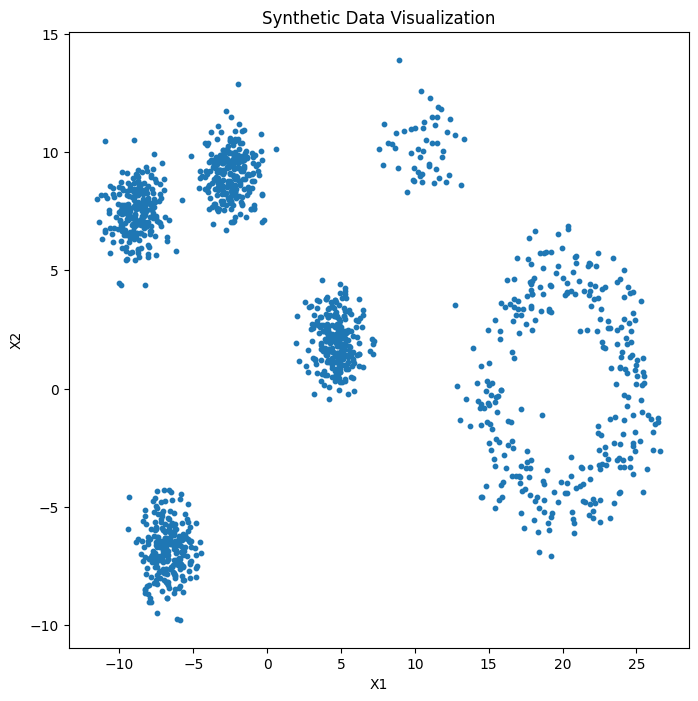

In [25]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Synthetic Data Visualization")
plt.show()


3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

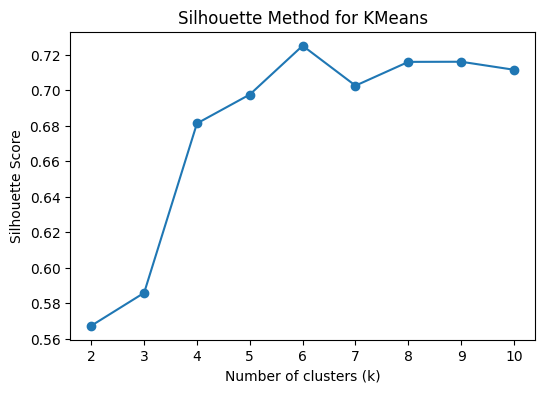

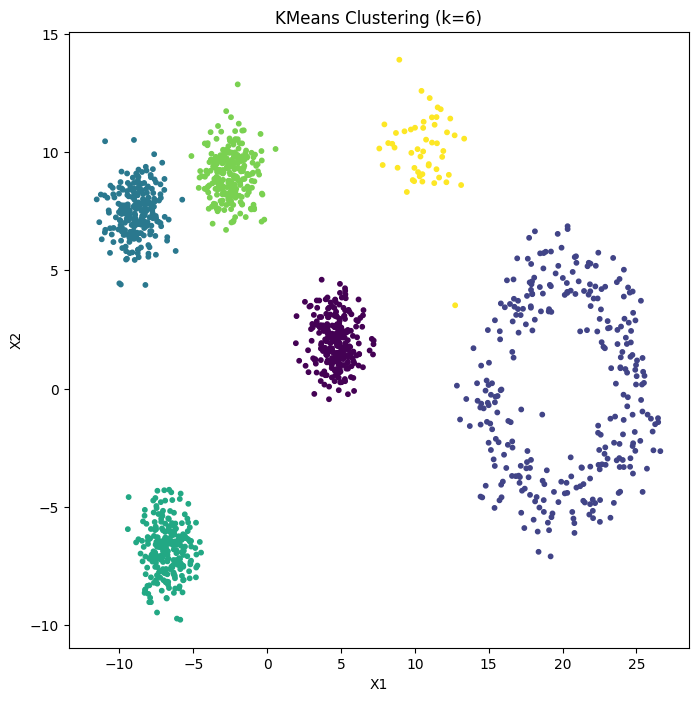

In [26]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sil_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init=20,
        random_state=42
    )
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

# Choose best k
best_k = k_values[sil_scores.index(max(sil_scores))]

# Plot Silhouette Method
plt.figure(figsize=(6, 4))
plt.plot(k_values, sil_scores, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for KMeans")
plt.show()

# Train final model
kmeans_final = KMeans(
    n_clusters=best_k,
    init="k-means++",
    n_init=20,
    random_state=42
)
labels_final = kmeans_final.fit_predict(X)

# Visualize result
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels_final, s=10)
plt.title(f"KMeans Clustering (k={best_k})")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

Best Silhouette: 0.7256900714288006
Best parameters: {'k': 6, 'linkage': 'ward'}


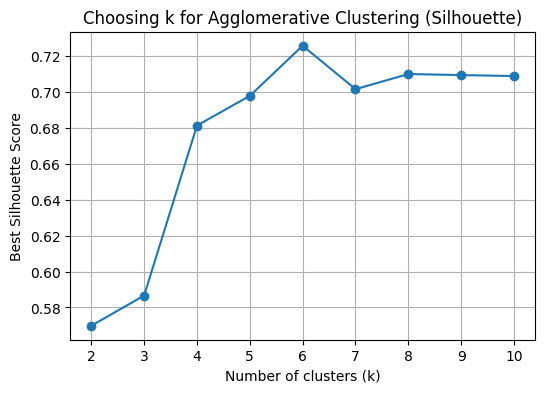

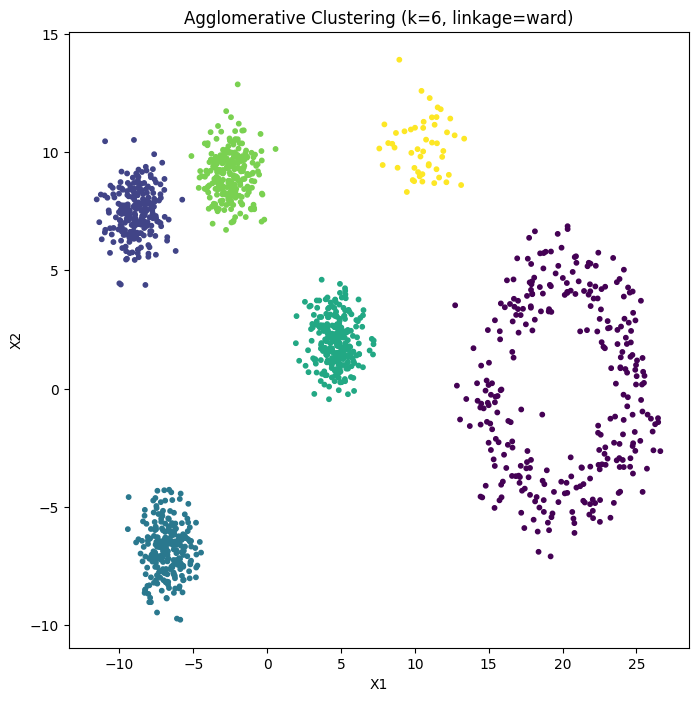

In [27]:

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# We will choose k using Silhouette (allowed: any method)
k_values = range(2, 11)
linkage_options = ["ward", "complete", "average", "single"]

best_score = -1
best_model = None
best_labels = None
best_params = None

scores_for_plot = []  # store best silhouette per k (across linkages) for a curve

for k in k_values:
    best_k_score = -1

    for linkage in linkage_options:
        # ward linkage requires Euclidean distance and does not accept affinity/metric in many sklearn versions
        if linkage == "ward":
            model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        else:
            model = AgglomerativeClustering(n_clusters=k, linkage=linkage)

        labels = model.fit_predict(X)

        # Silhouette score to evaluate clustering quality
        score = silhouette_score(X, labels)

        if score > best_k_score:
            best_k_score = score

        if score > best_score:
            best_score = score
            best_model = model
            best_labels = labels
            best_params = {"k": k, "linkage": linkage}

    scores_for_plot.append(best_k_score)

# Chosen k is the one from best_params
print("Best Silhouette:", best_score)
print("Best parameters:", best_params)

# Plot silhouette curve (best score per k across linkages)
plt.figure(figsize=(6, 4))
plt.plot(list(k_values), scores_for_plot, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Best Silhouette Score")
plt.title("Choosing k for Agglomerative Clustering (Silhouette)")
plt.grid(True)
plt.show()

# Visualize best clustering result
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=best_labels, s=10)
plt.title(f"Agglomerative Clustering (k={best_params['k']}, linkage={best_params['linkage']})")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


Best DBSCAN Silhouette (excluding noise): 0.9073002229337694
Best DBSCAN params: {'eps': 0.2, 'min_samples': 10, 'n_clusters': 5}


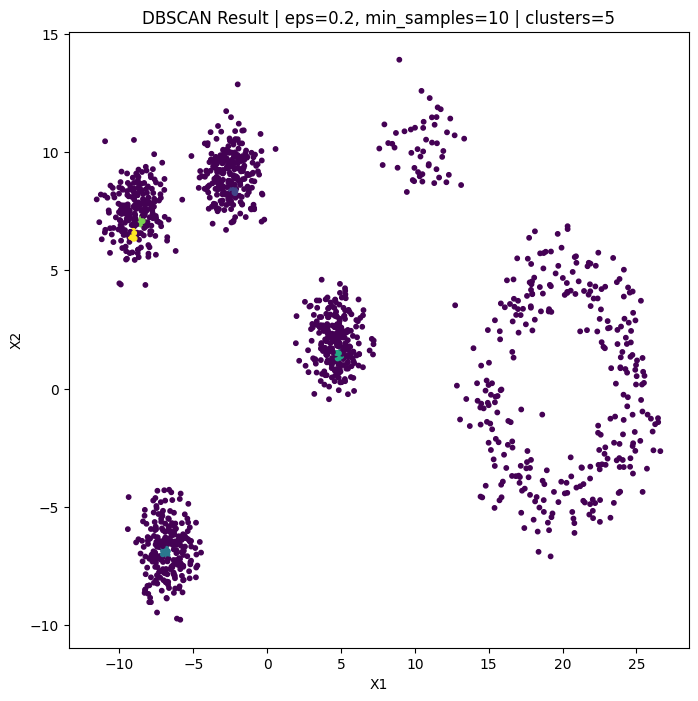

In [28]:
# 5. Train DBSCAN + explore and optimize options

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# DBSCAN grid to explore
eps_values = np.linspace(0.2, 2.5, 12)          # adjust range if needed
min_samples_values = [3, 5, 10, 20]

best_score = -1
best_params = None
best_labels = None
best_model = None

results = []

for eps in eps_values:
    for min_samp in min_samples_values:
        model = DBSCAN(eps=float(eps), min_samples=int(min_samp))
        labels = model.fit_predict(X)

        # Count clusters excluding noise (-1)
        unique_labels = set(labels)
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

        # Skip degenerate solutions: need at least 2 clusters for silhouette
        if n_clusters < 2:
            continue

        # Silhouette: exclude noise points (-1) to evaluate clustering quality on clustered points
        mask = labels != -1
        if mask.sum() < 2:
            continue

        try:
            score = silhouette_score(X[mask], labels[mask])
        except Exception:
            continue

        results.append((eps, min_samp, n_clusters, score))

        if score > best_score:
            best_score = score
            best_params = {"eps": float(eps), "min_samples": int(min_samp), "n_clusters": int(n_clusters)}
            best_labels = labels
            best_model = model

print("Best DBSCAN Silhouette (excluding noise):", best_score)
print("Best DBSCAN params:", best_params)

# Visualize best result
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=best_labels, s=10)
plt.title(f"DBSCAN Result | eps={best_params['eps']}, min_samples={best_params['min_samples']} | clusters={best_params['n_clusters']}")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

6. Compare the results and choose the best method for the data


In [29]:
# 6. Compare the results and choose the best method for the data

# ----- KMeans -----
kmeans_best_k = best_k
kmeans_best_sil = max(sil_scores)

# ----- Agglomerative -----
agg_k = None
agg_linkage = None
agg_sil = best_score

try:
    agg_k = agg_best_params["k"]
    agg_linkage = agg_best_params["linkage"]
except:
    pass

# ----- DBSCAN -----
dbscan_sil = best_score
dbscan_eps = None
dbscan_min_samples = None
dbscan_clusters = None

try:
    dbscan_eps = dbscan_best_params["eps"]
    dbscan_min_samples = dbscan_best_params["min_samples"]
    dbscan_clusters = dbscan_best_params["n_clusters"]
except:
    pass


print("=== Best Results Summary ===")
print(f"KMeans        : best_k={kmeans_best_k}, silhouette={kmeans_best_sil:.4f}")

if agg_k is not None:
    print(f"Agglomerative: k={agg_k}, linkage={agg_linkage}, silhouette={agg_sil:.4f}")
else:
    print("Agglomerative: result available (see plot), silhouette computed")

if dbscan_eps is not None:
    print(f"DBSCAN        : eps={dbscan_eps}, min_samples={dbscan_min_samples}, clusters={dbscan_clusters}, silhouette={dbscan_sil:.4f}")
else:
    print("DBSCAN        : result available (see plot), silhouette computed")


# ----- Choose best method by Silhouette -----
scores = {
    "KMeans": kmeans_best_sil,
    "Agglomerative": agg_sil,
    "DBSCAN": dbscan_sil
}

best_method = max(scores, key=scores.get)

print("\n=== Final Decision ===")
print(f"Chosen best method: {best_method}")

if best_method == "DBSCAN":
    print("Reason: Handles non-linear cluster shapes and explicitly detects noise.")
elif best_method == "Agglomerative":
    print("Reason: Hierarchical structure captures relationships better than KMeans.")
else:
    print("Reason: Efficient for compact, spherical clusters but weaker on non-linear data.")

=== Best Results Summary ===
KMeans        : best_k=6, silhouette=0.7251
Agglomerative: k=6, linkage=ward, silhouette=0.9073
DBSCAN        : eps=0.2, min_samples=10, clusters=5, silhouette=0.9073

=== Final Decision ===
Chosen best method: Agglomerative
Reason: Hierarchical structure captures relationships better than KMeans.


## Part B – Experiments Tracking (MLflow) + Excel Report + Evaluation

In this part, I run at least 10 experiments with different hyperparameters,
track them using MLflow, evaluate with at least two measures,
and export all experiments to an Excel file.

In [32]:
!pip install mlflow
import mlflow
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

mlflow.set_experiment("Ex3_PartB_Clustering")

rows = []

def two_metrics(X, labels, method):
    # metric1: silhouette (higher better)
    # metric2: davies-bouldin (lower better)
    if method == "DBSCAN":
        mask = labels != -1
        uniq = set(labels[mask])
        if len(uniq) < 2 or mask.sum() < 2:
            return np.nan, np.nan, int(np.sum(labels == -1)), len(uniq)
        return (
            silhouette_score(X[mask], labels[mask]),
            davies_bouldin_score(X[mask], labels[mask]),
            int(np.sum(labels == -1)),
            len(uniq)
        )
    else:
        uniq = set(labels)
        if len(uniq) < 2:
            return np.nan, np.nan, 0, len(uniq)
        return (
            silhouette_score(X, labels),
            davies_bouldin_score(X, labels),
            0,
            len(uniq)
        )

# >=10 experiments (we do 16)
experiments = []

# KMeans (6)
for k in [2, 3, 4, 5, 6, 7]:
    experiments.append(("KMeans", {"k": k}))

# Agglomerative (4)
for k, linkage in [(3, "ward"), (4, "complete"), (5, "average"), (6, "single")]:
    experiments.append(("Agglomerative", {"k": k, "linkage": linkage}))

# DBSCAN (6)
for eps, ms in [(0.4, 5), (0.6, 5), (0.8, 5), (1.0, 10), (1.2, 10), (1.5, 20)]:
    experiments.append(("DBSCAN", {"eps": eps, "min_samples": ms}))

print("Total Part B experiments:", len(experiments))

for method, params in experiments:
    with mlflow.start_run(run_name=f"{method}_{params}"):
        if method == "KMeans":
            model = KMeans(n_clusters=params["k"], init="k-means++", n_init=20, random_state=42)
            labels = model.fit_predict(X)

        elif method == "Agglomerative":
            model = AgglomerativeClustering(n_clusters=params["k"], linkage=params["linkage"])
            labels = model.fit_predict(X)

        else:  # DBSCAN
            model = DBSCAN(eps=params["eps"], min_samples=params["min_samples"])
            labels = model.fit_predict(X)

        sil, dbi, n_noise, n_clusters = two_metrics(X, labels, method)

        # log params
        mlflow.log_param("method", method)
        for p, v in params.items():
            mlflow.log_param(p, v)

        # log metrics (NaN -> -1)
        mlflow.log_metric("silhouette", float(sil) if not np.isnan(sil) else -1.0)
        mlflow.log_metric("davies_bouldin", float(dbi) if not np.isnan(dbi) else -1.0)
        mlflow.log_metric("n_clusters", int(n_clusters))
        mlflow.log_metric("n_noise", int(n_noise))

        rows.append({
            "Method": method,
            "Params": str(params),
            "Silhouette": sil,
            "DaviesBouldin": dbi,
            "NumClusters": n_clusters,
            "NumNoise": n_noise
        })

df_partB = pd.DataFrame(rows)
df_partB

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.1/197.1 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.4/808.4 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.9 MB/s eta 0:00:00


2026/02/23 23:18:56 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/02/23 23:18:56 INFO mlflow.store.db.utils: Updating database tables
2026/02/23 23:18:59 INFO mlflow.tracking.fluent: Experiment with name 'Ex3_PartB_Clustering' does not exist. Creating a new experiment.


Total Part B experiments: 16


,Method,Params,Silhouette,DaviesBouldin,NumClusters,NumNoise
0,KMeans,{'k': 2},0.567259,0.632656,2,0
1,KMeans,{'k': 3},0.585790,0.535154,3,0
2,KMeans,{'k': 4},0.681319,0.481191,4,0
3,KMeans,{'k': 5},0.697614,0.433968,5,0
4,KMeans,{'k': 6},0.725118,0.388403,6,0
5,KMeans,{'k': 7},0.702604,0.549218,7,0
6,Agglomerative,"{'k': 3, 'linkage': 'ward'}",0.580623,0.530689,3,0
7,Agglomerative,"{'k': 4, 'linkage': 'complete'}",0.681264,0.480769,4,0
8,Agglomerative,"{'k': 5, 'linkage': 'average'}",0.692341,0.406553,5,0
9,Agglomerative,"{'k': 6, 'linkage': 'single'}",0.613328,0.460464,6,0


In [35]:

excel_name = "Fatima_Atamlhe_ex3.xlsx"
df_partB.sort_values(by="Silhouette", ascending=False).to_excel(excel_name, index=False)
print("Saved Excel file:", excel_name)

Saved Excel file: Fatima_Atamlhe_ex3.xlsx


In [36]:
from google.colab import files
files.download("Fatima_Atamlhe_ex3.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>